## Import Libraries

In [270]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors

## Dataset

In [271]:
data = pd.read_csv('lok_sabha_results_2024.csv')
df = pd.read_csv('Indian General Elections 2024.csv', encoding='latin1')
data2 = pd.read_csv('bye_elections.csv')

In [272]:
print(df.shape)
df.head(7)

(543, 9)


,State/UT,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,1,BISHNU PADA RAY,Bharatiya Janata Party,KULDEEP RAI SHARMA,Indian National Congress,24396,Result Declared
1,Andhra Pradesh,Amalapuram (SC),7,G M HARISH (BALAYOGI),Telugu Desam,RAPAKA VARAPRASADA RAO,Yuvajana Sramika Rythu Congress Party,342196,Result Declared
2,Andhra Pradesh,Anakapalle,5,C.M.RAMESH,Bharatiya Janata Party,BUDI MUTYALA NAIDU,Yuvajana Sramika Rythu Congress Party,296530,Result Declared
3,Andhra Pradesh,Ananthapur,19,AMBICA G LAKSHMINARAYANA VALMIKI,Telugu Desam,MALAGUNDLA SANKAR NARAYANA,Yuvajana Sramika Rythu Congress Party,188555,Result Declared
4,Andhra Pradesh,Araku (ST),1,GUMMA THANUJA RANI,Yuvajana Sramika Rythu Congress Party,KOTHAPALLI GEETHA,Bharatiya Janata Party,50580,Result Declared
5,Andhra Pradesh,Bapatla (SC),15,KRISHNA PRASAD TENNETI,Telugu Desam,NANDIGAM SURESH BABU,Yuvajana Sramika Rythu Congress Party,208031,Result Declared
6,Andhra Pradesh,Chittoor(SC),25,DAGGUMALLA PRASADA RAO,Telugu Desam,REDDEPPA.N .,Yuvajana Sramika Rythu Congress Party,220479,Result Declared


In [273]:
print(data.shape)
data.head(7)

(543, 8)


,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared
5,ARANI,12,THARANIVENTHAN M S,Dravida Munnetra Kazhagam,"GAJENDRAN, G.V.",All India Anna Dravida Munnetra Kazhagam,208766,Result Declared
6,Adilabad,1,GODAM NAGESH,Bharatiya Janata Party,ATHRAM SUGUNA,Indian National Congress,90652,Result Declared


In [274]:
df.describe(include=[np.number])

,Const. No.
count,543.000000
mean,18.178637
std,16.427840
min,1.000000
25%,6.000000
50%,14.000000
75%,25.000000
max,80.000000


## Seat Distribution by Party

In [275]:
party_votes = data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)
data['Margin'] = pd.to_numeric(data['Margin'], errors='coerce')
max_margin = data.loc[data['Margin'].idxmax()]
min_margin = data.loc[data['Margin'].idxmin()]

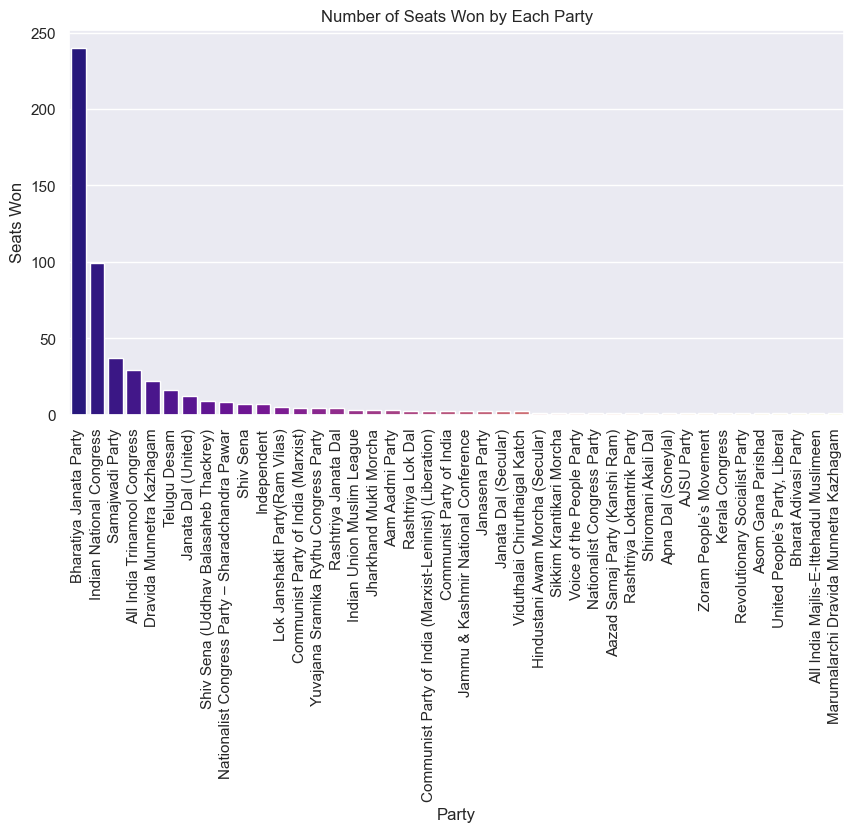

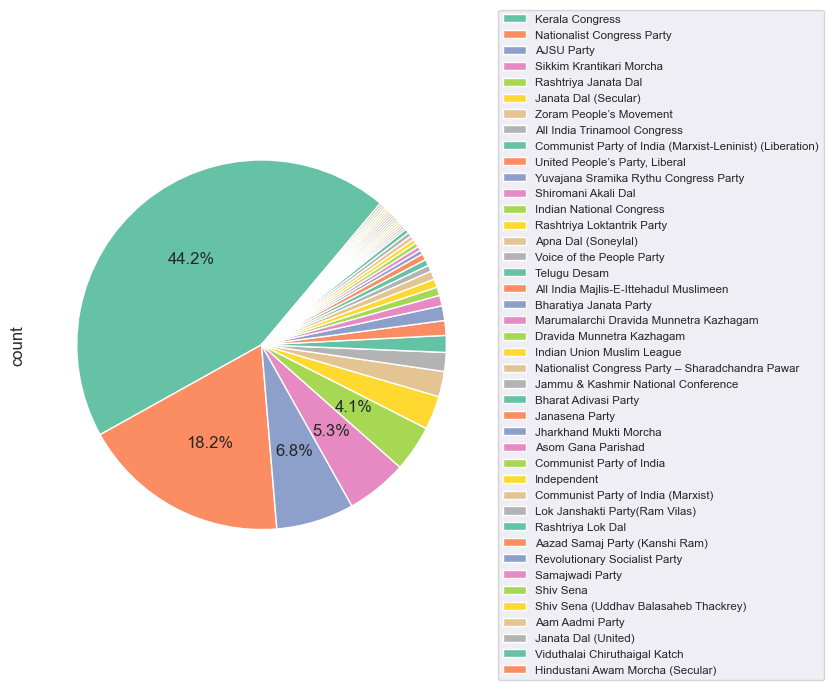

In [276]:
leading_party_highest_votes = party_votes.idxmax()
leading_party_lowest_votes = party_votes.idxmin()

seats_won = data['Leading Party'].value_counts()
autopct = lambda v: f'{v:.1f}%' if v > 3 else None

plt.figure(figsize=(10, 5))
sns.barplot(x=seats_won.index, y=seats_won.values, palette='plasma')
plt.title('Number of Seats Won by Each Party')
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.xticks(rotation=90)
plt.show()
data["Leading Party"].value_counts().plot.pie(figsize=(6,6),startangle=50,colors=sns.color_palette('Set2'),labels = None,autopct=autopct)
plt.legend(labels=party_votes.index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='x-small')
plt.show()

## Instance of uncontested seat and two seats by same candidate

In [277]:
duplicate = data[data.duplicated(['Leading Candidate'], keep=False)]
duplicate

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
430,Rae Bareli,36,RAHUL GANDHI,Indian National Congress,DINESH PRATAP SINGH,Bharatiya Janata Party,390030.0,Result Declared
539,Wayanad,4,RAHUL GANDHI,Indian National Congress,ANNIE RAJA,Communist Party of India,364422.0,Result Declared


In [278]:
df2 = data[data['Status'] != 'Result Declared']
df2

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
493,Surat,24,MUKESHKUMAR CHANDRAKAANT DALAL,Bharatiya Janata Party,NaN,NaN,NaN,Uncontested


## Vote Distribution by Party

In [279]:
party_votes = data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)
print(party_votes)

Leading Party
Bharatiya Janata Party                                      46081536.0
Indian National Congress                                    13005922.0
Dravida Munnetra Kazhagam                                    5081582.0
All India Trinamool Congress                                 4910963.0
Telugu Desam                                                 3660927.0
Samajwadi Party                                              2869566.0
Janata Dal (United)                                          1386413.0
Shiv Sena (Uddhav Balasaheb Thackrey)                        1015430.0
Communist Party of India (Marxist)                            746237.0
Lok Janshakti Party(Ram Vilas)                                720603.0
Nationalist Congress Party – Sharadchandra Pawar              716571.0
Indian Union Muslim League                                    702660.0
Shiv Sena                                                     700373.0
Independent                                                   6

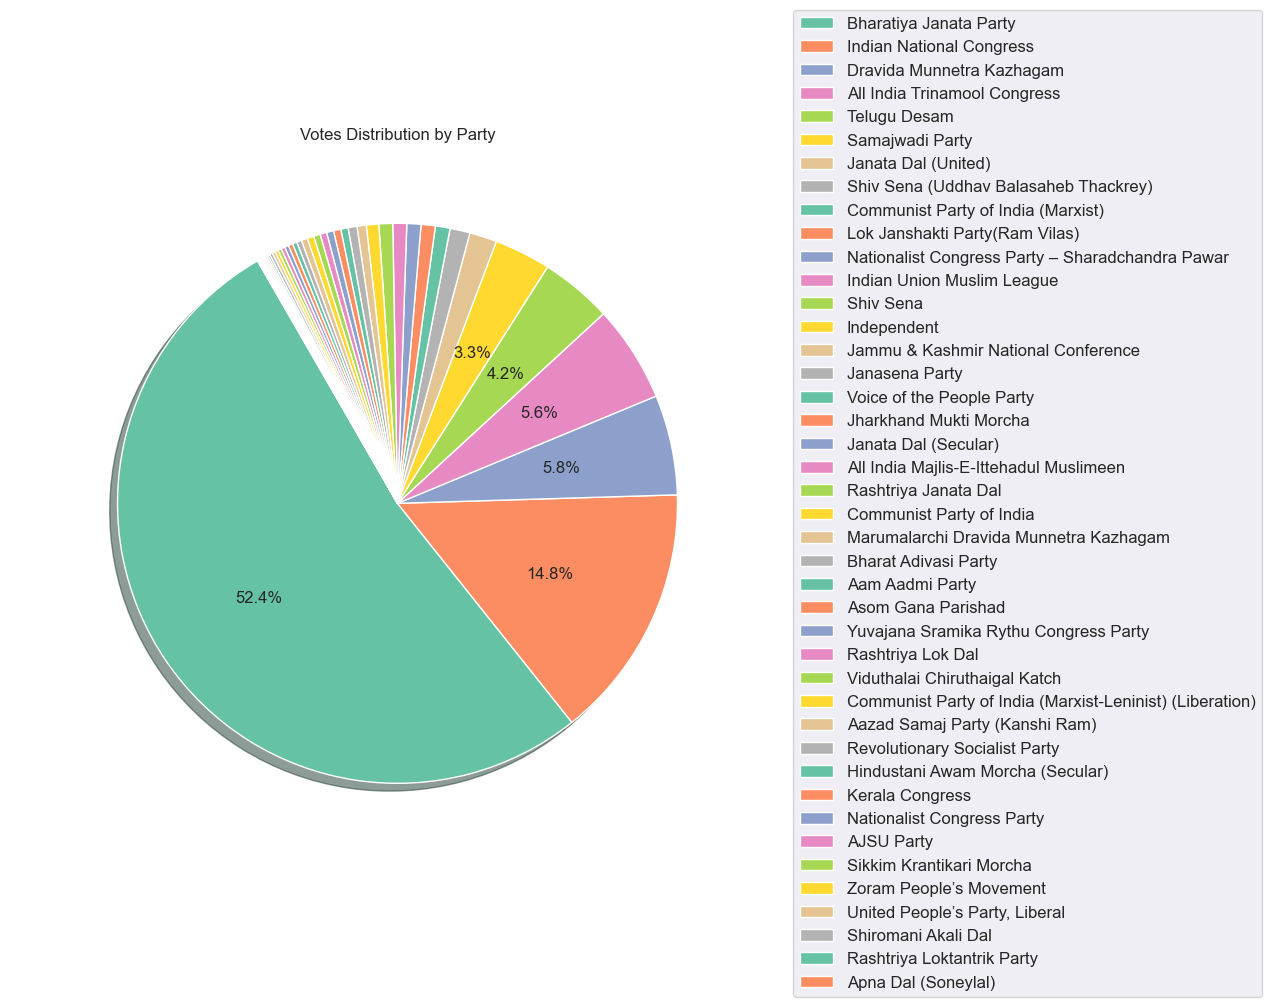

In [280]:
# colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 5)
# This can be used for having random slice colors for the pie chart, just change to colors = colors in plt.pie()
autopct = lambda v: f'{v:.1f}%' if v > 3 else None
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(party_votes,labels=None,colors=sns.color_palette('Set2'), autopct= autopct, startangle=120,shadow = True, wedgeprops=dict(edgecolor='w'))
plt.title('Votes Distribution by Party', pad=40)
plt.axis('equal')

plt.legend(labels=party_votes.index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')


plt.show()

## Seat Distribution Pivot Plot and Bar Graph by State

C:\Users\Jewel Chowdhury\AppData\Local\Temp\ipykernel_4892\1378875255.py:11: UserWarning: Glyph 150 (\x96) missing from current font.
  plt.tight_layout()
C:\Users\Jewel Chowdhury\AppData\Local\Temp\ipykernel_4892\1378875255.py:11: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.tight_layout()


<Figure size 1200x1000 with 0 Axes>

D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


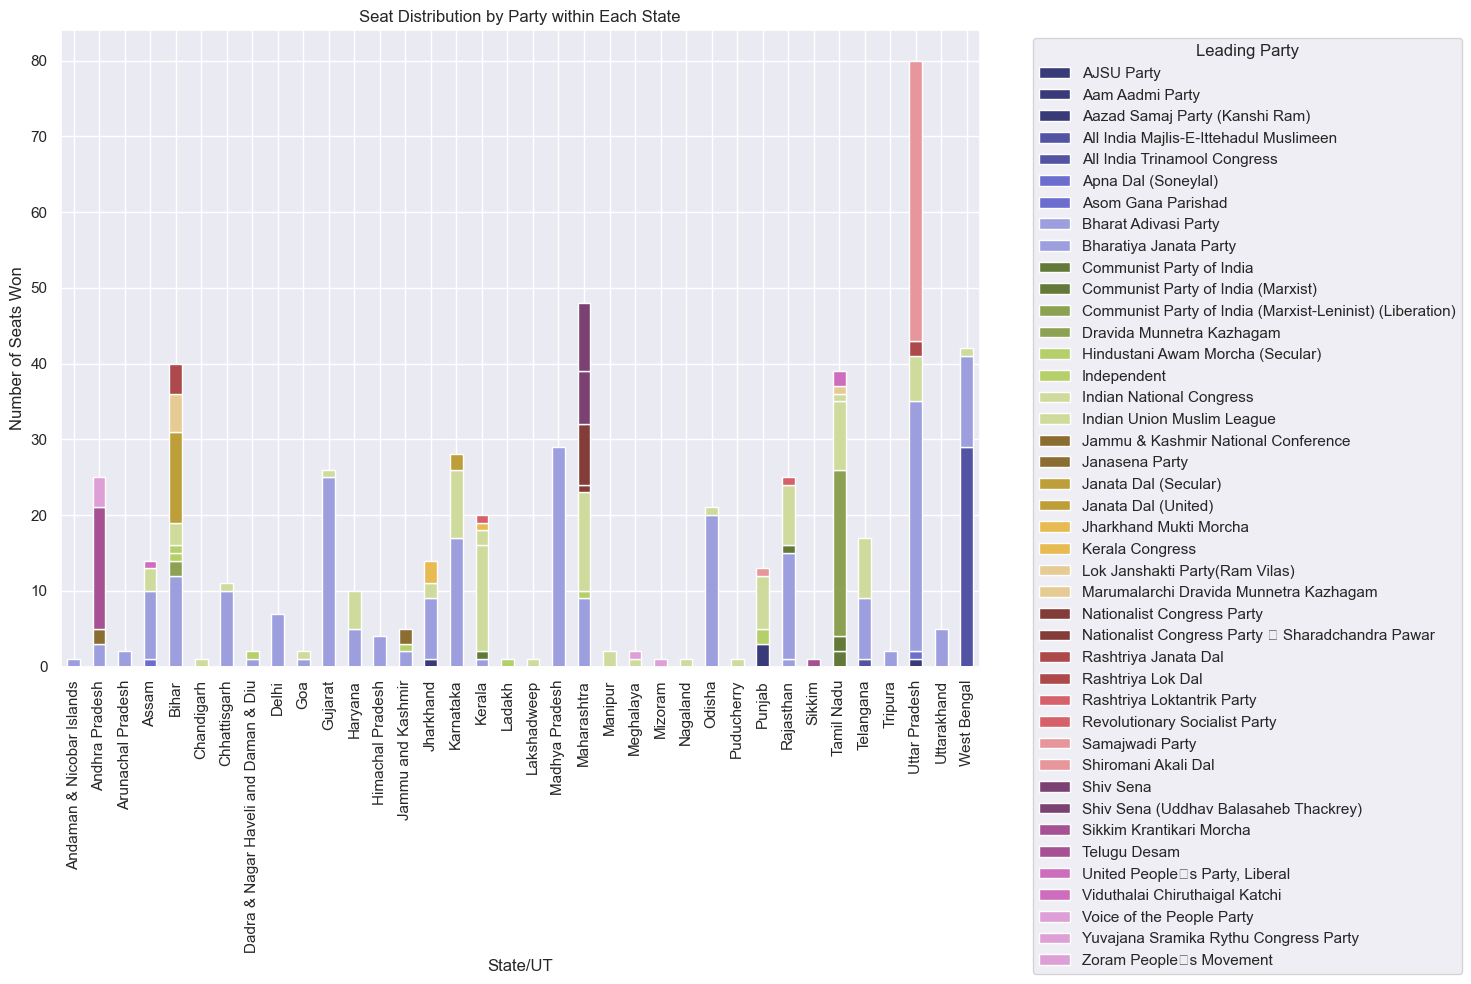

In [281]:
pivot_table = df.pivot_table(index='State/UT', columns='Leading Party', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 10))
pivot_table.plot(kind='bar', stacked=True, colormap='tab20b', figsize=(15, 10))
# addlabels('State/UT', seats_won)
plt.title('Seat Distribution by Party within Each State')
plt.xlabel('State/UT')
plt.ylabel('Number of Seats Won')
plt.xticks(rotation=90)
plt.legend(title='Leading Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [282]:
party_votes = data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)
data['Margin'] = pd.to_numeric(data['Margin'], errors='coerce')
max_margin = data.loc[data['Margin'].idxmax()]
min_margin = data.loc[data['Margin'].idxmin()]

In [283]:
def addlabels(x,y):
    for i in range(36):
        plt.text(i,y[i],y[i], ha = 'center', va='bottom')

C:\Users\Jewel Chowdhury\AppData\Local\Temp\ipykernel_4892\104198688.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i,y[i],y[i], ha = 'center', va='bottom')


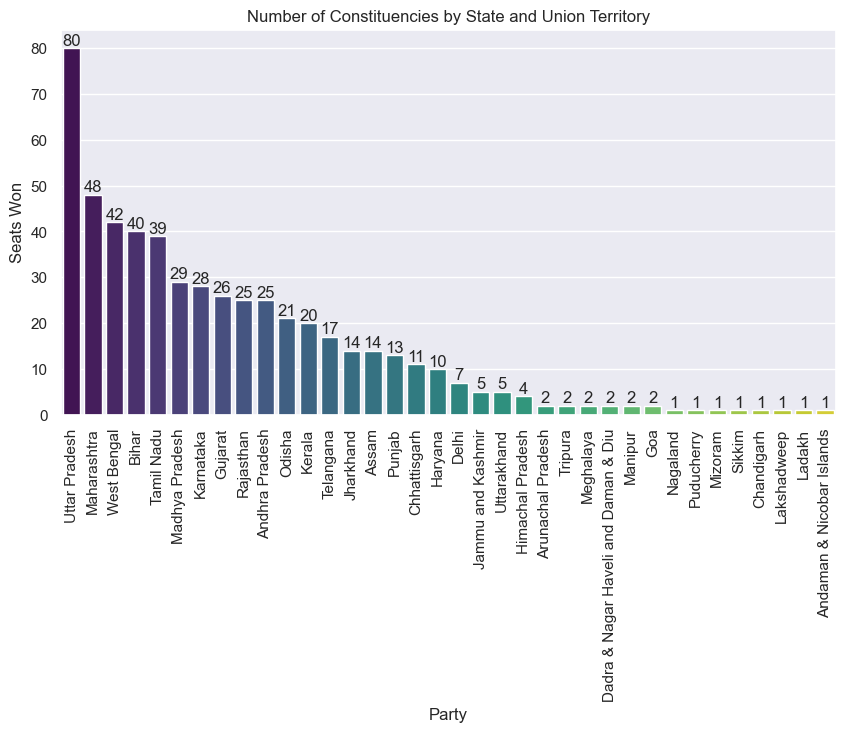

In [284]:
leading_party_highest_votes = party_votes.idxmax()
leading_party_lowest_votes = party_votes.idxmin()

seats_won = df['State/UT'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=seats_won.index, y=seats_won.values, palette='viridis')
addlabels('State/UT', seats_won)
plt.title('Number of Constituencies by State and Union Territory')
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.xticks(rotation=90)
plt.show()

## Vote Distribution by State

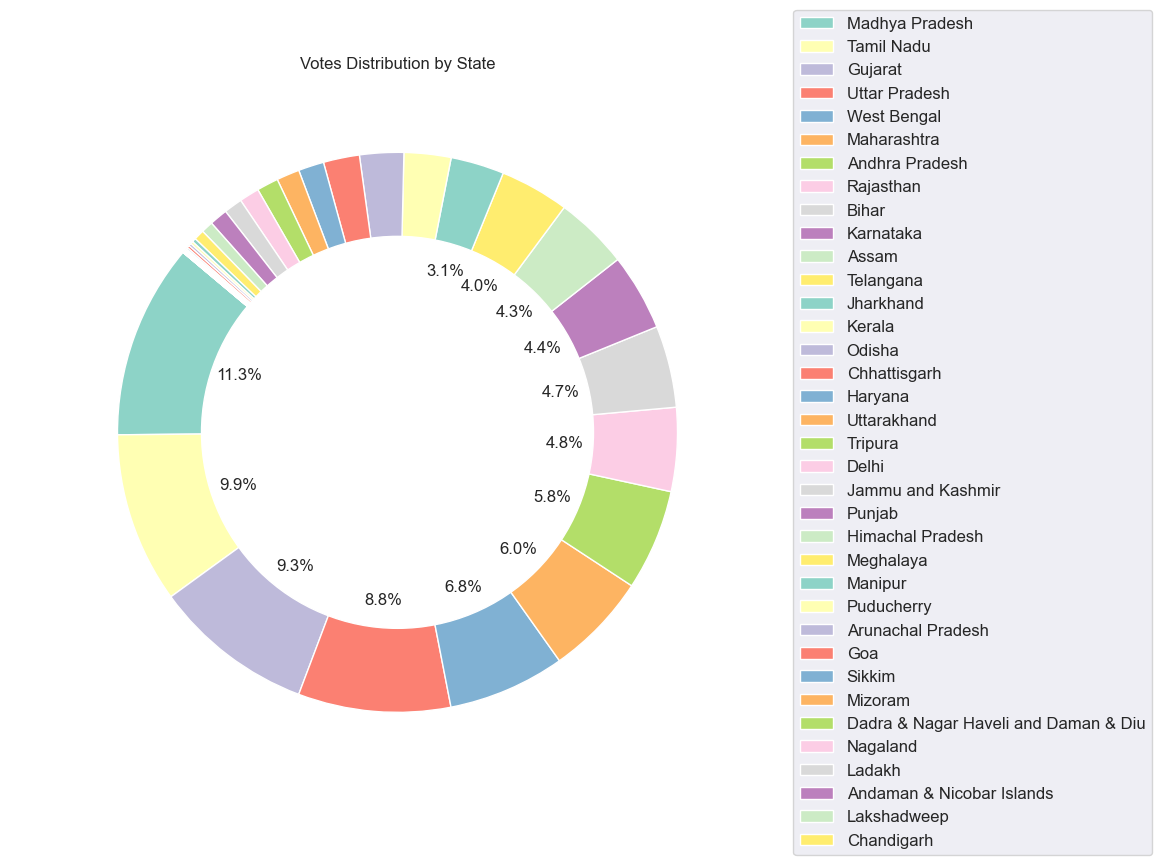

In [285]:
df['Margin'] = pd.to_numeric(df['Margin'], errors='coerce')
party_votes_statewise = df.groupby('State/UT')['Margin'].sum().sort_values(ascending=False)

# colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 5)
# This can be used for having random slice colors for the pie chart if used as an argument in plt.pie()
autopct = lambda v: f'{v:.1f}%' if v > 3 else None
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(party_votes_statewise,labels=None,colors=sns.color_palette('Set3'), autopct= autopct, startangle=140,shadow = False, wedgeprops=dict(edgecolor='w'))
plt.title('Votes Distribution by State', pad=40)
plt.axis('equal')

plt.legend(labels=party_votes_statewise.index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()


## Party vs State Heat Map

D:\Anaconda\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.draw()
D:\Anaconda\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.draw()
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


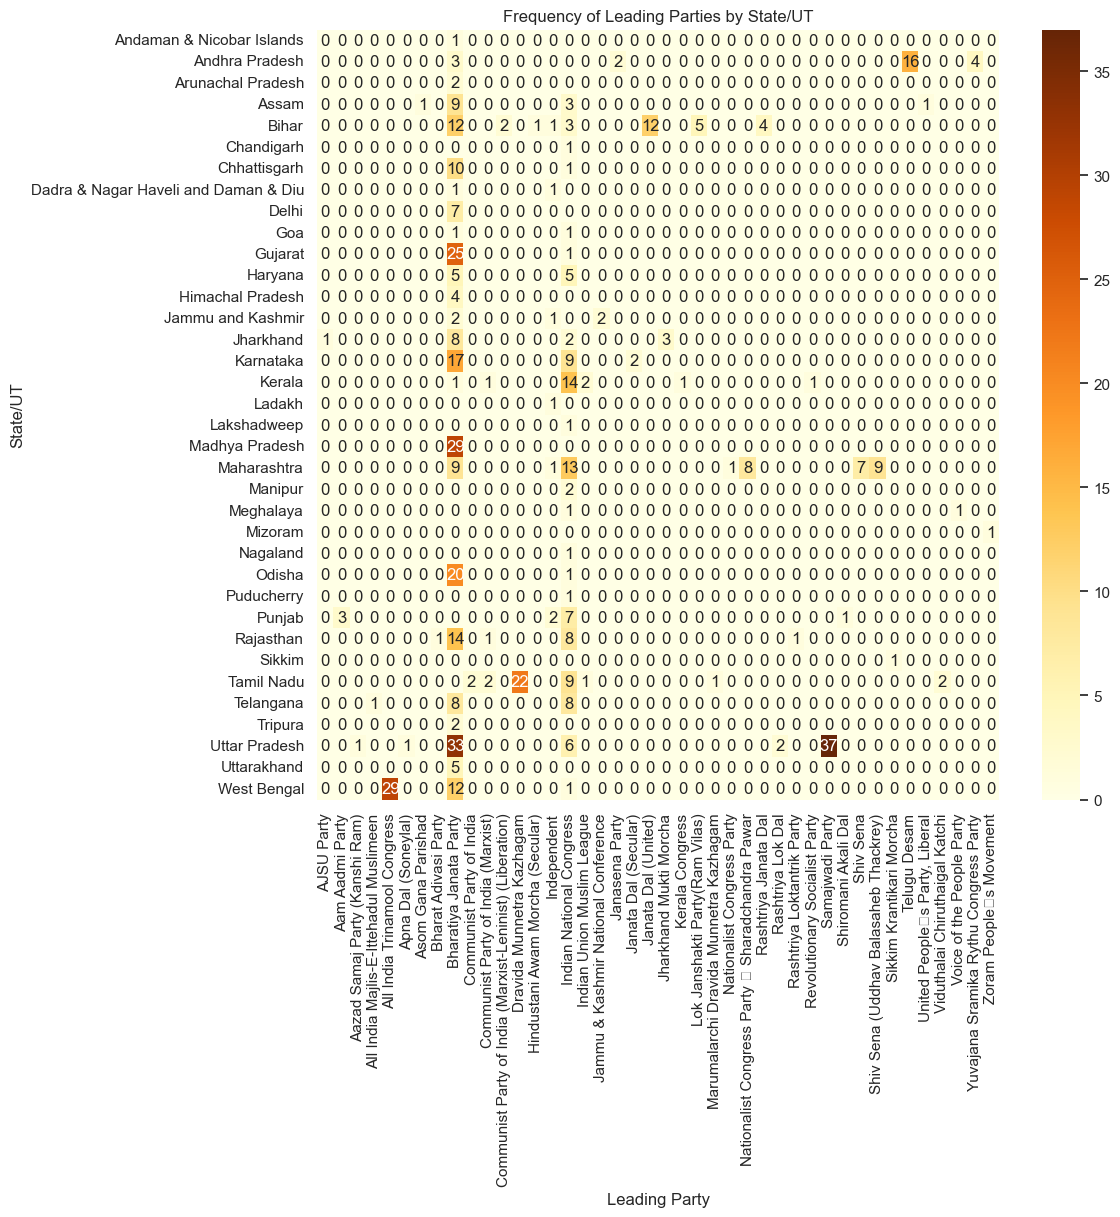

In [286]:
plt.figure(figsize=(11, 10))
sns.heatmap(pivot_table, annot=True, cmap='YlOrBr', fmt='d')
plt.title('Frequency of Leading Parties by State/UT')
plt.xlabel('Leading Party')
plt.ylabel('State/UT')
plt.xticks(rotation=90)
plt.show()

## Winning Margin Distribution Histogram

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


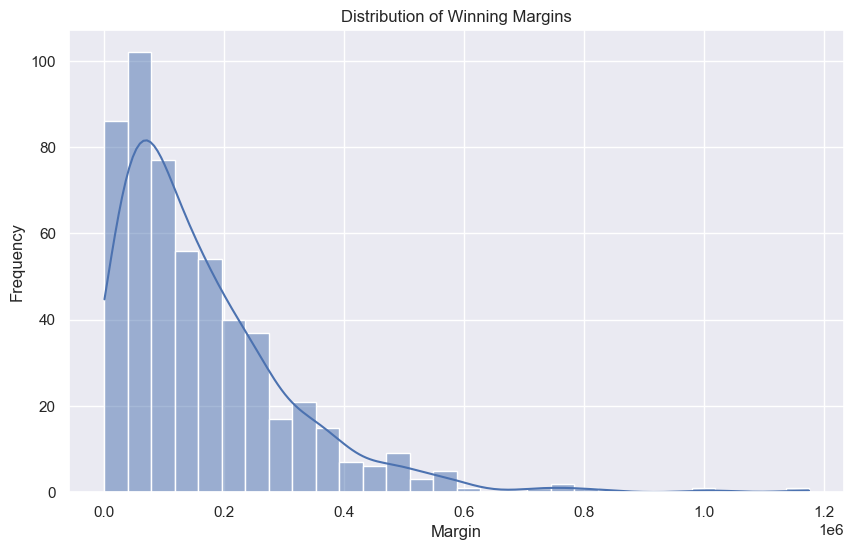

In [287]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Margin'], bins=30, kde = True)
plt.title('Distribution of Winning Margins')
plt.xlabel('Margin')
plt.ylabel('Frequency')
plt.show()

## Leading and Trailing parties Seat Distribution Histogram

C:\Users\Jewel Chowdhury\AppData\Local\Temp\ipykernel_4892\3111005429.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data,x="Leading Party",kde=True,palette ="bright")
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jewel Chowdhury\AppData\Local\Temp\ipykernel_4892\3111005429.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data,x="Trailing Party",kde=True,palette='bright')
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Trailing Party', ylabel='Count'>

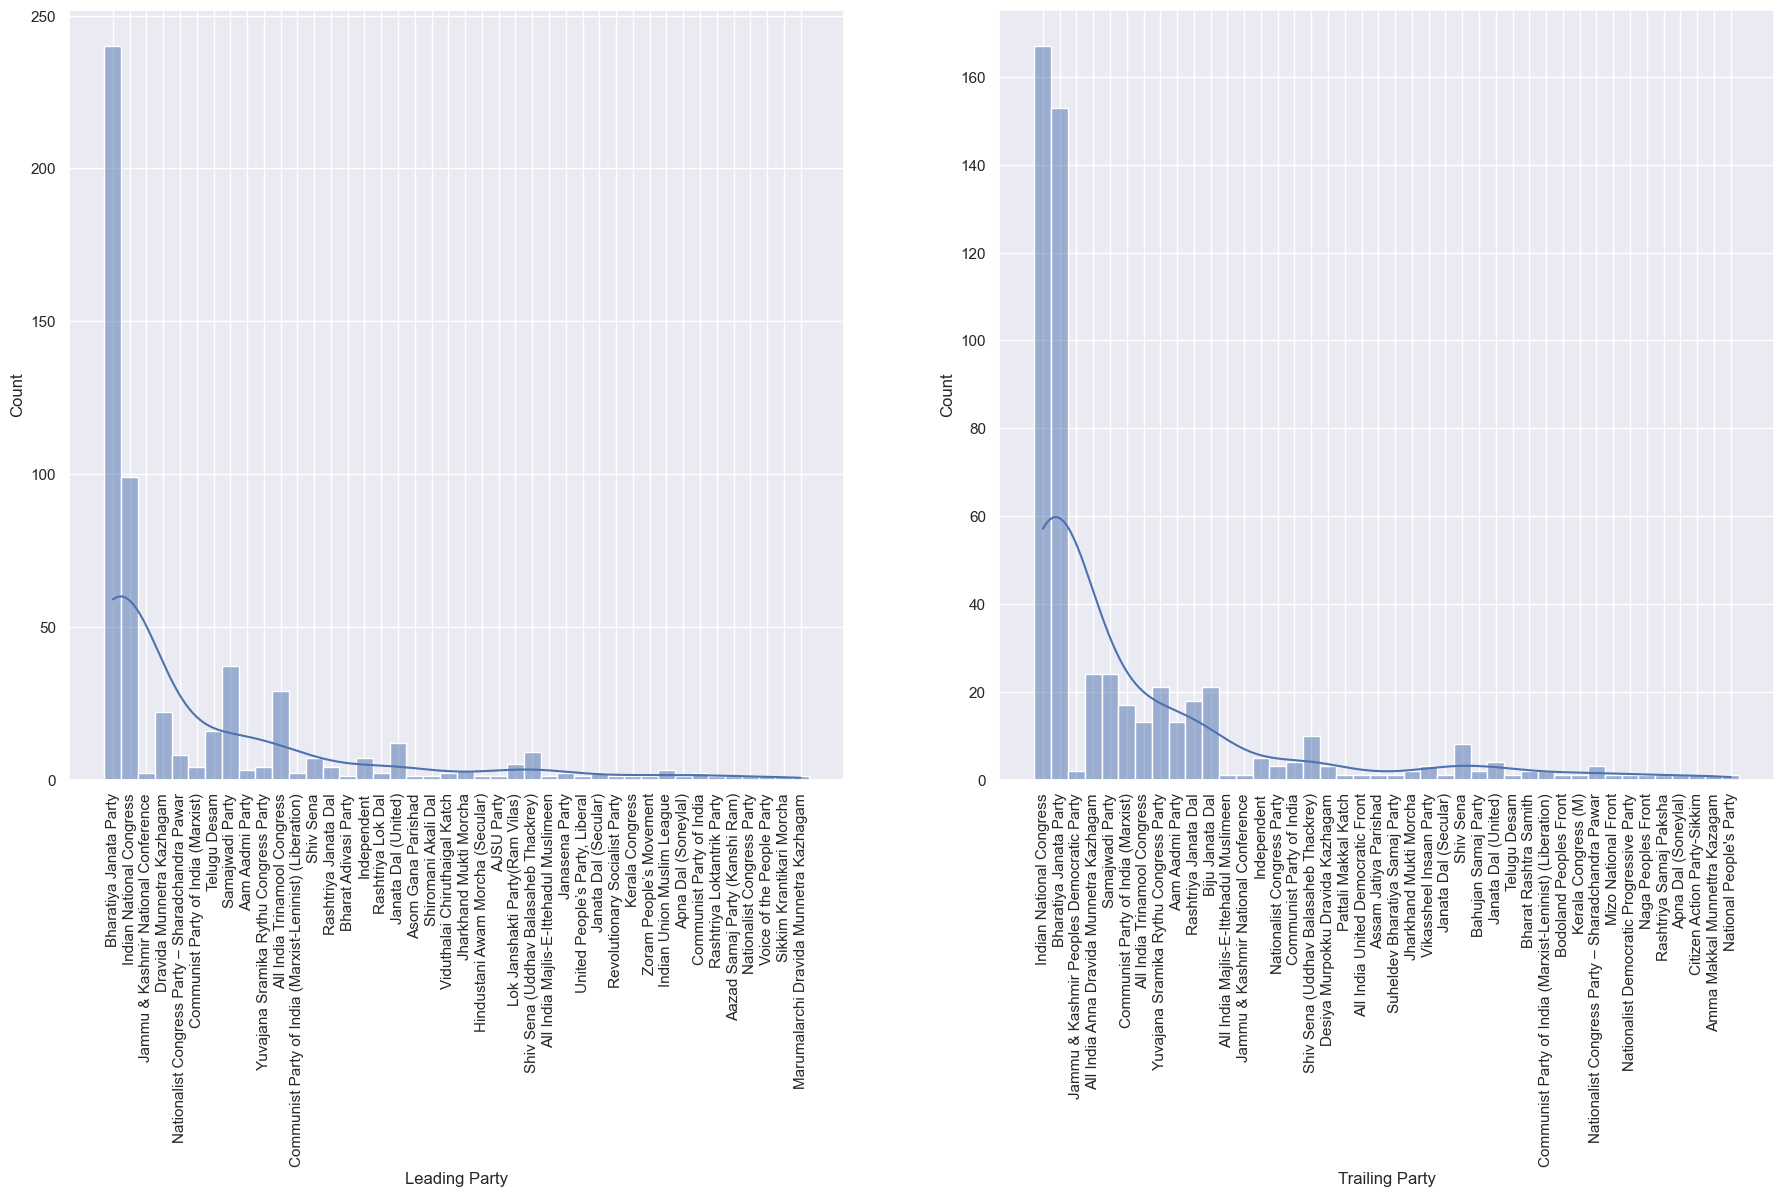

In [288]:
plt.figure(figsize=(22,10))
plt.subplot(1,2,1)
plt.xticks(rotation=90)
sns.histplot(data=data,x="Leading Party",kde=True,palette ="bright")
plt.subplot(1,2,2)
plt.xticks(rotation=90)
sns.histplot(data=data,x="Trailing Party",kde=True,palette='bright')

## Top 5 Winning Margin Candidates

In [289]:
df4 = data.nlargest(5, 'Margin')
df4

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
221,INDORE,26,SHANKAR LALWANI,Bharatiya Janata Party,SANJAY S/O LAKSHMAN SOLANKI,Bahujan Samaj Party,1175092.0,Result Declared
157,Dhubri,2,RAKIBUL HUSSAIN,Indian National Congress,MOHAMMED BADRUDDIN AJMAL,All India United Democratic Front,1012476.0,Result Declared
525,VIDISHA,18,SHIVRAJ SINGH CHOUHAN,Bharatiya Janata Party,PRATAPBHANU SHARMA,Indian National Congress,821408.0,Result Declared
384,Navsari,25,C R PATIL,Bharatiya Janata Party,NAISHADHBHAI BHUPATBHAI DESAI,Indian National Congress,773551.0,Result Declared
186,Gandhinagar,6,AMIT SHAH,Bharatiya Janata Party,SONAL RAMANBHAI PATEL,Indian National Congress,744716.0,Result Declared


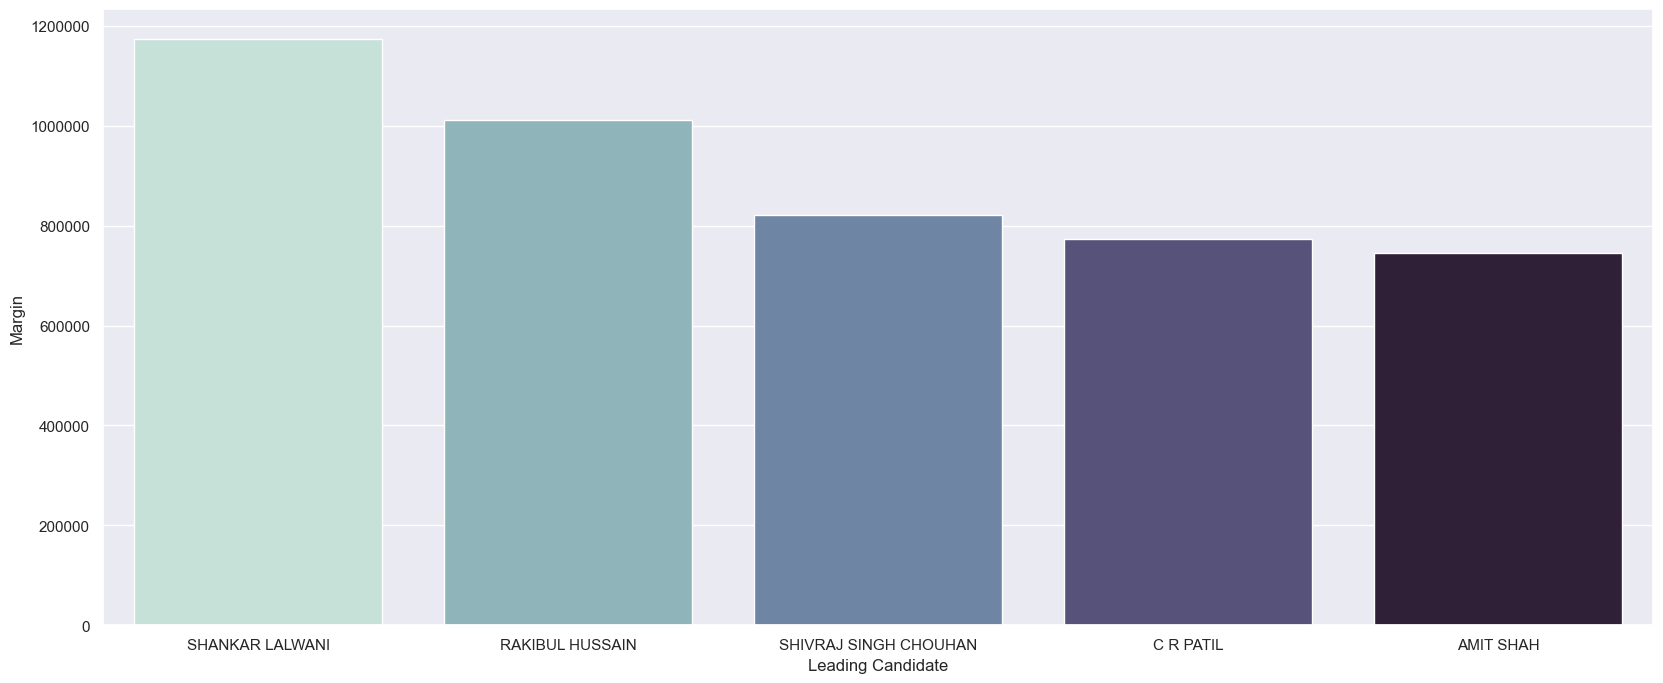

In [290]:
width = 20
height = 8
sns.set(rc = {'figure.figsize':(width,height)})
ax = sns.barplot(data = df4, x = 'Leading Candidate', y = 'Margin', palette="ch: s=.5, r=-.5")
ax.ticklabel_format(style='plain', axis="y")

## Result of Bye Election to Assembly Constituencies

In [291]:
data2

,Constituency,State,Leading Candidate,Leading Party
0,Agiaon (195),Bihar,SHIV PRAKASH RANJAN,Communist Party of India (Marxist-Leninist) ...
1,Vijapur (26),Gujarat,DR. C. J. CHAVDA,Bharatiya Janata Party
2,Porbandar (83),Gujarat,ARJUN DEVABHAI MODHWADIA,Bharatiya Janata Party
3,Manavadar (85),Gujarat,ARVINDBHAI JINABHAI LADANI,Bharatiya Janata Party
4,Khambhat (108),Gujarat,CHIRAGKUMAR ARVINDBHAI PATEL,Bharatiya Janata Party
5,Vaghodia (136),Gujarat,DHARMENDRASINH VAGHELA (BAPU),Bharatiya Janata Party
6,KARNAL (21),Haryana,NAYAB SINGH,Bharatiya Janata Party
7,DHARAMSHALA (18),Himachal Pradesh,SUDHIR SHARMA,Bharatiya Janata Party
8,LAHAUL & SPITI (21),Himachal Pradesh,ANURADHA RANA,Indian National Congress
9,SUJANPUR (37),Himachal Pradesh,CAPTAIN RANJIT SINGH,Indian National Congress
